Importing Libraries

In [1]:
# Install required libraries into the current kernel
%pip install -q pandas numpy matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



Data Display

In [4]:
# Set a style for plots
sns.set_style("whitegrid")

# --- 1. Load the Dataset ---
print("--- 1. Loading the Dataset ---")
# Load the synthetic student performance dataset
try:
    df = pd.read_csv("student_performance.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: student_performance.csv not found. Please ensure the dataset is generated first.")
    exit()

# Display basic information about the dataset
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe())

--- 1. Loading the Dataset ---
Dataset loaded successfully.

Dataset Head:
   study_hours  previous_grade  attendance_rate  socio_economic_status  \
0    11.490142       78.577874         0.690557                      3   
1     9.585207       80.607845         0.790062                      4   
2    11.943066       85.830512         0.850524                      4   
3    14.569090       85.538021         0.854698                      1   
4     9.297540       61.223306         0.804993                      2   

   final_exam_score  
0         89.758758  
1         93.633362  
2         99.420235  
3         86.355892  
4         68.684001  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours            200 non-null    float64
 1   previous_grade         200 non-null    float64
 2   attendance_rate 

Feature Engineering and Test and Train spillting

In [11]:
# Define features (X) and target (y)
X = df[["study_hours", "previous_grade", "attendance_rate", "socio_economic_status"]]
y = df["final_exam_score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")


Training set size: 160 samples
Testing set size: 40 samples


Demonstrating Polynomial Regression and Overfitting/Underfitting


--- 2. Demonstrating Polynomial Regression and Overfitting/Underfitting ---


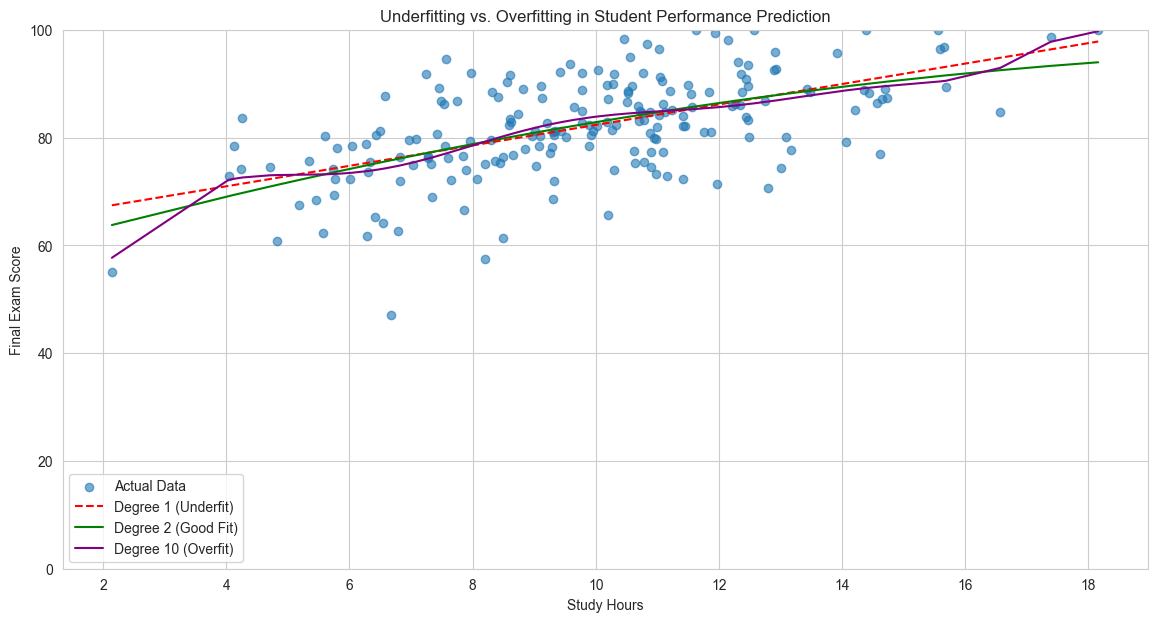

Generated 'overfitting_underfitting_plot.png'

--- 3. Bias-Variance Tradeoff (Conceptual) ---
The plots above visually demonstrate the bias-variance tradeoff:
- Degree 1 model: High bias (simplistic assumptions), low variance (consistent but wrong). Underfitting.
- Degree 2 model: Balanced bias and variance. Good fit.
- Degree 10 model: Low bias (fits training data well), high variance (sensitive to noise). Overfitting.


In [16]:
# --- 2. Demonstrate Polynomial Regression and Overfitting/Underfitting ---
print("\n--- 2. Demonstrating Polynomial Regression and Overfitting/Underfitting ---")

# For visualization, let's use only one feature: study_hours, to make plots easier
X_single = X[["study_hours"]]
y_single = y

# Sort the data for smoother plotting of polynomial curves
sorted_indices = X_single["study_hours"].argsort()
X_single_sorted = X_single.iloc[sorted_indices]
y_single_sorted = y_single.iloc[sorted_indices]

# Linear Regression (Degree 1 - Underfitting Example)
lin_reg = LinearRegression()
lin_reg.fit(X_single, y_single)
y_pred_lin = lin_reg.predict(X_single_sorted)

# Polynomial Regression (Degree 2 - Potentially Good Fit)
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_2 = poly_features_2.fit_transform(X_single)
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly_2, y_single)
y_pred_poly_2 = poly_reg_2.predict(poly_features_2.transform(X_single_sorted))

# Polynomial Regression (Degree 10 - Overfitting Example)
poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X_single)
poly_reg_10 = LinearRegression()
poly_reg_10.fit(X_poly_10, y_single)
y_pred_poly_10 = poly_reg_10.predict(poly_features_10.transform(X_single_sorted))

# Plotting for visualization of overfitting/underfitting
plt.figure(figsize=(14, 7))
plt.scatter(X_single["study_hours"], y_single, label="Actual Data", alpha=0.6)
plt.plot(X_single_sorted, y_pred_lin, color='red', linestyle='--', label='Degree 1 (Underfit)')
plt.plot(X_single_sorted, y_pred_poly_2, color='green', linestyle='-', label='Degree 2 (Good Fit)')
plt.plot(X_single_sorted, y_pred_poly_10, color='purple', linestyle='-', label='Degree 10 (Overfit)')
plt.title('Underfitting vs. Overfitting in Student Performance Prediction')
plt.xlabel('Study Hours')
plt.ylabel('Final Exam Score')
plt.legend()
plt.ylim(0, 100)
plt.savefig('overfitting_underfitting_plot.png')
plt.show()
plt.close()
print("Generated 'overfitting_underfitting_plot.png'")

# --- 3. Bias-Variance Tradeoff (Conceptual) ---
print("\n--- 3. Bias-Variance Tradeoff (Conceptual) ---")
print("The plots above visually demonstrate the bias-variance tradeoff:")
print("- Degree 1 model: High bias (simplistic assumptions), low variance (consistent but wrong). Underfitting.")
print("- Degree 2 model: Balanced bias and variance. Good fit.")
print("- Degree 10 model: Low bias (fits training data well), high variance (sensitive to noise). Overfitting.")

Regularization


--- 4. Applying Ridge and Lasso Regression ---

Linear Regression (Full Features) - MSE: 25.84, R2: 0.65
Ridge Regression (alpha=10.0) - MSE: 25.35, R2: 0.66
Ridge Coefficients: [5.38438954 4.21622159 1.19247757 2.93536934]
Lasso Regression (alpha=0.08) - MSE: 25.81, R2: 0.65
Lasso Coefficients: [5.63387069 4.36600323 1.22463353 3.04860986]


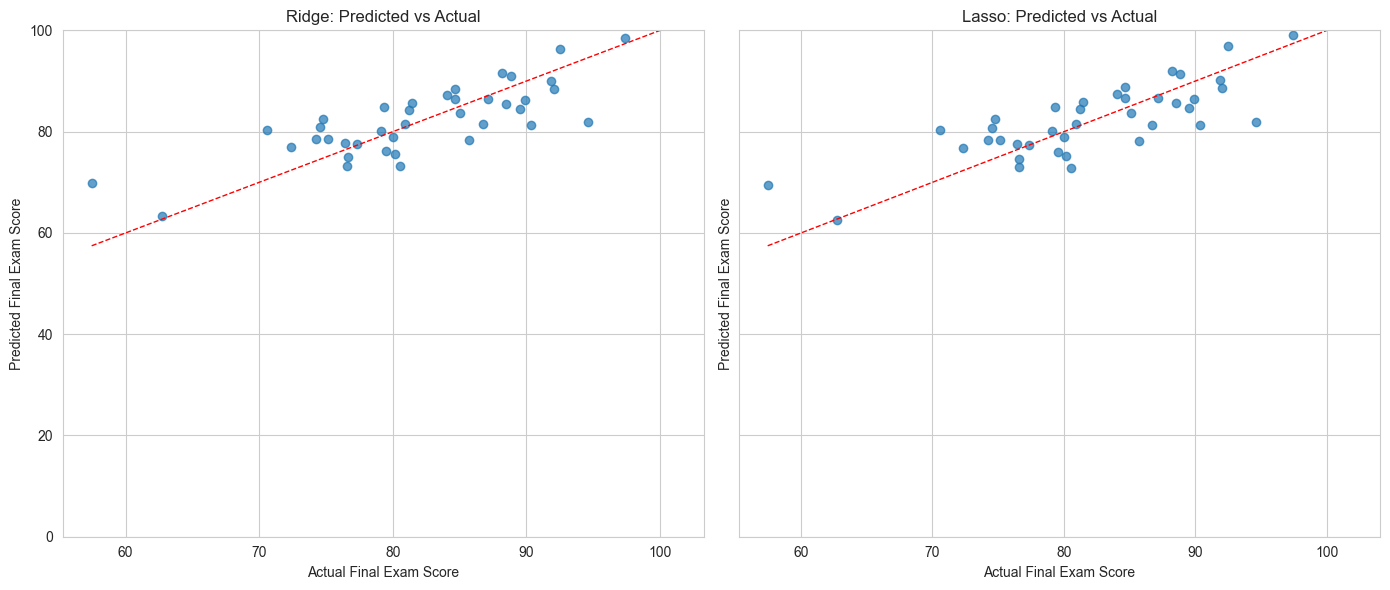

Saved 'ridge_lasso_pred_vs_actual.png'


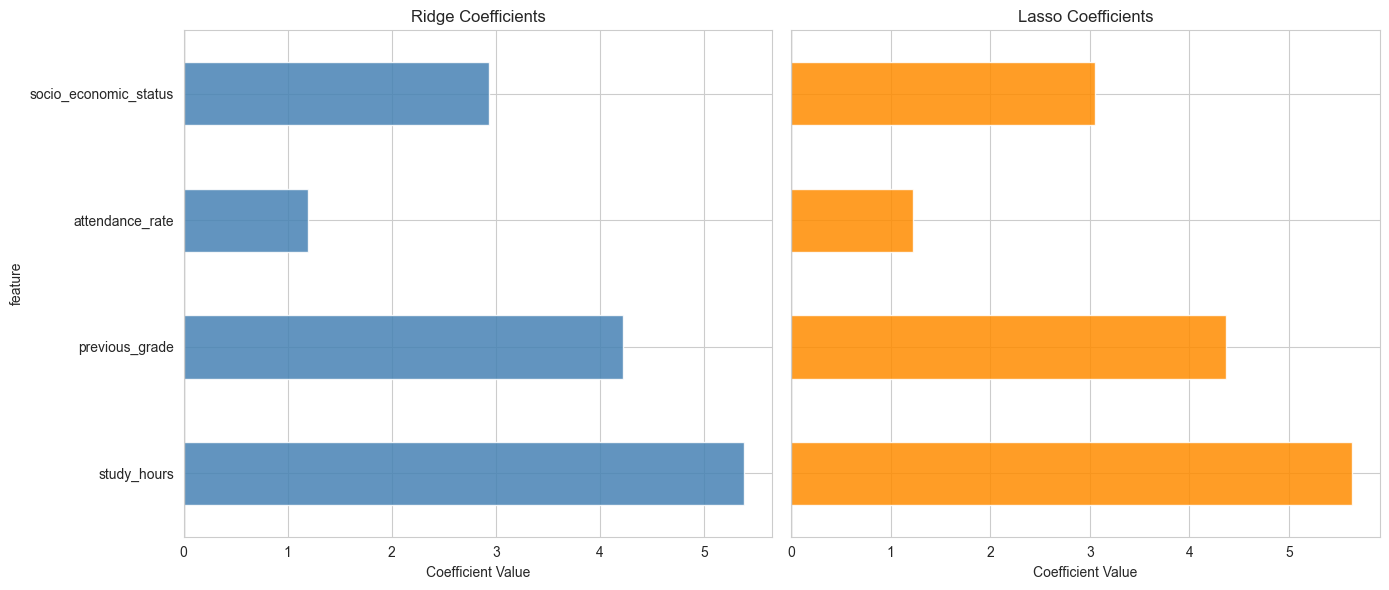

Saved 'ridge_lasso_coefficients.png'


In [24]:
# --- 4. Applying Ridge and Lasso Regression ---
print("\n--- 4. Applying Ridge and Lasso Regression ---")

# Scale features for regularization (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression (Baseline)
lin_reg_full = LinearRegression()
lin_reg_full.fit(X_train_scaled, y_train)
y_pred_lin_full = lin_reg_full.predict(X_test_scaled)
mse_lin_full = mean_squared_error(y_test, y_pred_lin_full)
r2_lin_full = r2_score(y_test, y_pred_lin_full)
print(f"\nLinear Regression (Full Features) - MSE: {mse_lin_full:.2f}, R2: {r2_lin_full:.2f}")

# Ridge Regression
ridge_model = Ridge(alpha=10.0) # Default alpha
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression (alpha=10.0) - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.2f}")
print(f"Ridge Coefficients: {ridge_model.coef_}")

# Lasso Regression
lasso_model = Lasso(alpha=0.08) # Default alpha
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression (alpha=0.08) - MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}")
print(f"Lasso Coefficients: {lasso_model.coef_}")

# --- 4a. Visualizing Ridge and Lasso Models (inline in this cell) ---
feature_names = list(X.columns)

# Predicted vs Actual plots for Ridge and Lasso
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

plots = [
    ("Ridge", y_pred_ridge, axes[0]),
    ("Lasso", y_pred_lasso, axes[1]),
]

for model_name, y_pred, ax in plots:
    ax.scatter(y_test, y_pred, alpha=0.7)
    min_val = float(min(y_test.min(), y_pred.min()))
    max_val = float(max(y_test.max(), y_pred.max()))
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)
    ax.set_title(f"{model_name}: Predicted vs Actual")
    ax.set_xlabel("Actual Final Exam Score")
    ax.set_ylabel("Predicted Final Exam Score")

axes[0].set_ylim(0, 100)
plt.tight_layout()
plt.savefig('ridge_lasso_pred_vs_actual.png', dpi=120, bbox_inches='tight')
plt.show()
plt.close()
print("Saved 'ridge_lasso_pred_vs_actual.png'")

# Coefficient comparison
coef_df = pd.DataFrame({
    'feature': feature_names,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_model.coef_,
}).set_index('feature')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
coef_df['Ridge'].plot(kind='barh', ax=axes[0], color='steelblue', alpha=0.85)
axes[0].set_title('Ridge Coefficients')
axes[0].set_xlabel('Coefficient Value')
axes[0].axvline(0, color='k', linewidth=0.8)

coef_df['Lasso'].plot(kind='barh', ax=axes[1], color='darkorange', alpha=0.85)
axes[1].set_title('Lasso Coefficients')
axes[1].set_xlabel('Coefficient Value')
axes[1].axvline(0, color='k', linewidth=0.8)

plt.tight_layout()
plt.savefig('ridge_lasso_coefficients.png', dpi=120, bbox_inches='tight')
plt.show()
plt.close()
print("Saved 'ridge_lasso_coefficients.png'")


Cross-Validation


--- 5. Cross-Validation ---
Linear Regression CV MSE (mean +/- std): 22.87 +/- 5.05
Ridge Regression CV MSE (mean +/- std): 22.86 +/- 5.02
Lasso Regression CV MSE (mean +/- std): 22.89 +/- 5.04


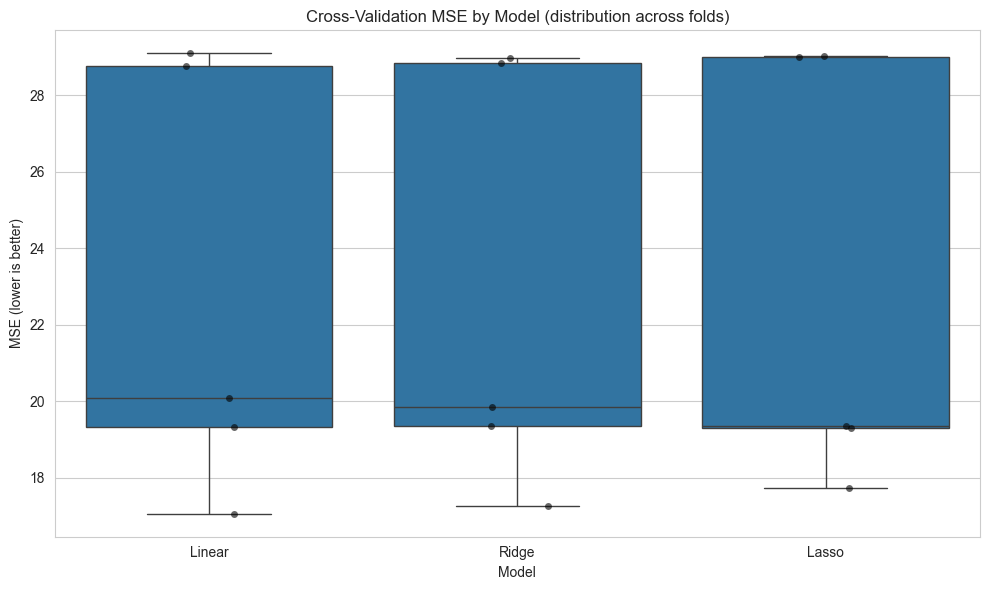

Saved 'cv_mse_distribution.png'


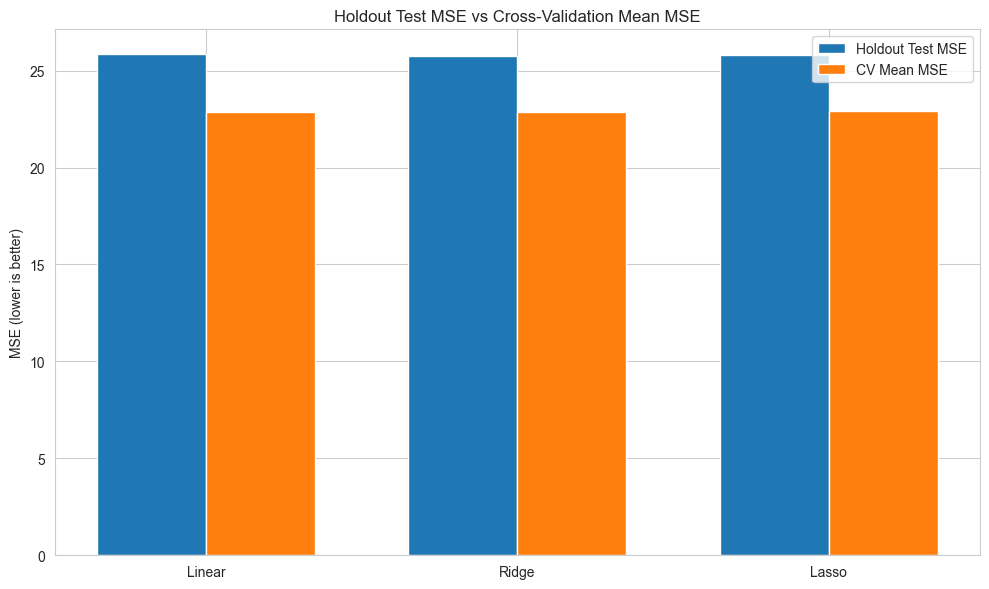

Saved 'cv_vs_holdout_mse.png'


In [8]:
# --- 5. Cross-Validation ---
print("\n--- 5. Cross-Validation ---")

# K-Fold Cross-Validation for Linear Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lin_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
print(f"Linear Regression CV MSE (mean +/- std): {-lin_scores.mean():.2f} +/- {lin_scores.std():.2f}")

# K-Fold Cross-Validation for Ridge Regression
ridge_scores = cross_val_score(Ridge(alpha=1.0), X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
print(f"Ridge Regression CV MSE (mean +/- std): {-ridge_scores.mean():.2f} +/- {ridge_scores.std():.2f}")

# K-Fold Cross-Validation for Lasso Regression
lasso_scores = cross_val_score(Lasso(alpha=0.1), X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
print(f"Lasso Regression CV MSE (mean +/- std): {-lasso_scores.mean():.2f} +/- {lasso_scores.std():.2f}")

# --- 5a. Visualizing CV MSE to explain improvement ---
lin_mse_folds = -lin_scores
ridge_mse_folds = -ridge_scores
lasso_mse_folds = -lasso_scores

# 1) Distribution across folds (boxplot with points)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

cv_df = pd.DataFrame({
    'MSE': np.concatenate([lin_mse_folds, ridge_mse_folds, lasso_mse_folds]),
    'Model': (['Linear'] * len(lin_mse_folds) +
              ['Ridge'] * len(ridge_mse_folds) +
              ['Lasso'] * len(lasso_mse_folds)),
    'Fold': list(range(1, len(lin_mse_folds) + 1)) * 3
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df, x='Model', y='MSE', whis=1.5)
sns.stripplot(data=cv_df, x='Model', y='MSE', color='black', alpha=0.6)
plt.title('Cross-Validation MSE by Model (distribution across folds)')
plt.ylabel('MSE (lower is better)')
plt.xlabel('Model')
plt.tight_layout()
plt.savefig('cv_mse_distribution.png', dpi=120, bbox_inches='tight')
plt.show()
plt.close()
print("Saved 'cv_mse_distribution.png'")

# 2) How CV compares to single holdout test MSE
cv_mean = {
    'Linear': float(lin_mse_folds.mean()),
    'Ridge': float(ridge_mse_folds.mean()),
    'Lasso': float(lasso_mse_folds.mean()),
}
holdout = {
    'Linear': float(mse_lin_full),
    'Ridge': float(mse_ridge),
    'Lasso': float(mse_lasso),
}

summary_df = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'Holdout Test MSE': [holdout['Linear'], holdout['Ridge'], holdout['Lasso']],
    'CV Mean MSE': [cv_mean['Linear'], cv_mean['Ridge'], cv_mean['Lasso']],
})

x = np.arange(len(summary_df))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, summary_df['Holdout Test MSE'], width, label='Holdout Test MSE')
ax.bar(x + width/2, summary_df['CV Mean MSE'], width, label='CV Mean MSE')
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Model'])
ax.set_ylabel('MSE (lower is better)')
ax.set_title('Holdout Test MSE vs Cross-Validation Mean MSE')
ax.legend()
plt.tight_layout()
plt.savefig('cv_vs_holdout_mse.png', dpi=120, bbox_inches='tight')
plt.show()
plt.close()
print("Saved 'cv_vs_holdout_mse.png'")


Hyperparameter Tuning with GridSearchCV

In [ ]:
# --- 6. Hyperparameter Tuning with GridSearchCV (for Ridge) ---
print("\n--- 6. Hyperparameter Tuning with GridSearchCV (for Ridge) ---")

# Define a range of alpha values to search
param_grid = {'alpha': np.logspace(-3, 2, 100)} # 100 values between 0.001 and 100

# Create GridSearchCV object
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit to the training data
grid_search_ridge.fit(X_train_scaled, y_train)

# Best alpha and corresponding score
print(f"Best alpha for Ridge: {grid_search_ridge.best_params_['alpha']:.4f}")
print(f"Best Ridge CV MSE: {-grid_search_ridge.best_score_:.2f}")

# Evaluate the best Ridge model on the test set
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_scaled)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
print(f"Best Ridge Model (Test Set) - MSE: {mse_best_ridge:.2f}, R2: {r2_best_ridge:.2f}")
print(f"Best Ridge Coefficients: {best_ridge_model.coef_}")


--- 6. Hyperparameter Tuning with GridSearchCV (for Ridge) ---
Best alpha for Ridge: 1.5199
Best Ridge CV MSE: 22.86
Best Ridge Model (Test Set) - MSE: 25.73, R2: 0.66
Best Ridge Coefficients: [5.66830883 4.40108378 1.29795204 3.0996167 ]
